# IBM Applied Data Science Capstone Final Project

### Week 5 Final Jupyter Notebook

### ANALYSIS OF RESTAURANTS NEAR HOSPITALS IN BANGALORE, INDIA

* Build a dataframe of Hospitals in Bangalore, India by web scraping the data from Wikipedia page
* Get the geographical coordinates of the Hospitals
* Obtain the venue data for the neighborhoods of the Hospitals from Foursquare API
* Explore and cluster the neighborhoods
* Analyze the various clusters 



## 1. Import Libraries

In [6]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

!conda install -c conda-forge geocoder --yes
import geocoder # to get coordinates

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print("Libraries imported.")

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

    altair:  4.1.0-py_1 conda-forge
    branca:  0.4.1-py_0 conda-forge
    fo

## 2. Scrap data from Wikipedia page into a DataFrame

In [7]:
# send the GET request
data = requests.get('https://en.wikipedia.org/wiki/Category:Hospitals_in_Bangalore').text


In [8]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

In [9]:
hospitalList = []
# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    hospitalList.append(row.text)

In [10]:
df = pd.DataFrame({"Hospital": hospitalList})
df.head()

,Hospital
0,Bangalore Baptist Hospital
1,Bowring & Lady Curzon Hospitals
2,Cloudnine Hospitals
3,Columbia Asia
4,Gunasheela Surgical and Maternity Hospital


In [11]:
# print the number of rows of the dataframe
df.shape

(27, 1)

## 3. Get the geographical coordinates

In [12]:
# define a function to get coordinates
def get_latlng(location):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Bangalore, India'.format(location))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [13]:

coords = [ get_latlng(location) for location in df["Hospital"].tolist() ]

In [14]:
coords


[[13.035850000000039, 77.58927000000006],
 [12.982160000000022, 77.60447000000005],
 [12.959340000000054, 77.65667000000008],
 [13.026280000000042, 77.58871000000005],
 [12.94055000000003, 77.57656000000003],
 [12.966180000000065, 77.58690000000007],
 [12.938220000000058, 77.59200000000004],
 [12.93616000000003, 77.59776000000005],
 [12.916040000000066, 77.55502000000007],
 [12.807430000000068, 77.69443000000007],
 [12.960390000000075, 77.57269000000008],
 [13.034240018126667, 77.71970999320956],
 [12.809660000000065, 77.69590000000005],
 [12.908490000000029, 77.64345000000003],
 [12.989440000000059, 77.73346000000004],
 [12.93906000000004, 77.59447000000006],
 [12.973600000000033, 77.63581000000005],
 [12.917550000000062, 77.55505000000005],
 [12.887280000000032, 77.45125000000007],
 [12.896850000000029, 77.46139000000005],
 [12.966180000000065, 77.58690000000007],
 [12.936140000000023, 77.59399000000008],
 [12.956860000000063, 77.71314000000007],
 [12.966180000000065, 77.586900000000

In [15]:
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [16]:
df_coords

,Latitude,Longitude
0,13.03585,77.58927
1,12.98216,77.60447
2,12.95934,77.65667
3,13.02628,77.58871
4,12.94055,77.57656
5,12.96618,77.58690
6,12.93822,77.59200
7,12.93616,77.59776
8,12.91604,77.55502
9,12.80743,77.69443


In [17]:
# merge the coordinates into the original dataframe
df['Latitude'] = df_coords['Latitude']
df['Longitude'] = df_coords['Longitude']
print(df.shape)
df


(27, 3)


,Hospital,Latitude,Longitude
0,Bangalore Baptist Hospital,13.03585,77.58927
1,Bowring & Lady Curzon Hospitals,12.98216,77.60447
2,Cloudnine Hospitals,12.95934,77.65667
3,Columbia Asia,13.02628,77.58871
4,Gunasheela Surgical and Maternity Hospital,12.94055,77.57656
5,HOSMAT,12.96618,77.58690
6,"Indira Gandhi Institute of Child Health, Banga...",12.93822,77.59200
7,Kidwai Memorial Institute of Oncology,12.93616,77.59776
8,Maharaja Agrasen Hospital (Bangalore),12.91604,77.55502
9,Mazumdar Shaw Medical Centre,12.80743,77.69443


## 4. Create a map of Bangalore with Hospitals superimposed on top

In [18]:
# get the coordinates of Bangalore.
address = 'Bangalore, India'

geolocator = Nominatim(user_agent="bangalore_hospitals")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bangalore, India {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bangalore, India 12.9791198, 77.5912997.


In [19]:
# create map of Bangalore
map_blore = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, hospital in zip(df['Latitude'], df['Longitude'], df['Hospital']):
    label = '{}'.format(location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_blore)  
    
map_blore

## 5. Use the Foursquare API to explore the neighborhoods

In [20]:
# define Foursquare Credentials and Version
CLIENT_ID = 'RAI3L4DYZ53TKBIKIMXPEWTLRYND0TSMB3FWV0NVAUX1UW2D'
CLIENT_SECRET = 'LK0L5SCPRWFHZ3T5DBHMAQH5YFY2TWBURGM4KCWYZU4DVSNM'
VERSION = '20200815'

print('Foursquare credentails:')
print('Client ID: ' + CLIENT_ID)
print('Client secret: ' + CLIENT_SECRET)

Foursquare credentails:
Client ID: RAI3L4DYZ53TKBIKIMXPEWTLRYND0TSMB3FWV0NVAUX1UW2D
Client secret: LK0L5SCPRWFHZ3T5DBHMAQH5YFY2TWBURGM4KCWYZU4DVSNM


In [21]:
radius = 5000
limit = 100

venues = []

for lat, long, hospital in zip(df['Latitude'], df['Longitude'], df['Hospital']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        limit)
    
    # make the GET request
    results = requests.get(url).json()['response']['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            hospital,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [22]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Hospital', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(2316, 7)


,Hospital,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Bangalore Baptist Hospital,13.03585,77.58927,Moto Store & Café,13.032086,77.590020,Motorcycle Shop
1,Bangalore Baptist Hospital,13.03585,77.58927,Ice N Spice by truffles,13.028079,77.573116,Burger Joint
2,Bangalore Baptist Hospital,13.03585,77.58927,Huliyappa Donne Biryani,13.026804,77.590756,Indian Restaurant
3,Bangalore Baptist Hospital,13.03585,77.58927,The BEL ST,13.030093,77.570509,Italian Restaurant
4,Bangalore Baptist Hospital,13.03585,77.58927,Corner House,13.028051,77.572970,Ice Cream Shop


In [23]:
venues_df.groupby(["Hospital"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Hospital,,,,,,
Bangalore Baptist Hospital,100,100,100,100,100,100
Bowring & Lady Curzon Hospitals,100,100,100,100,100,100
Cloudnine Hospitals,100,100,100,100,100,100
Columbia Asia,100,100,100,100,100,100
Gunasheela Surgical and Maternity Hospital,100,100,100,100,100,100
HOSMAT,100,100,100,100,100,100
"Indira Gandhi Institute of Child Health, Bangalore",100,100,100,100,100,100
Kidwai Memorial Institute of Oncology,100,100,100,100,100,100
Maharaja Agrasen Hospital (Bangalore),100,100,100,100,100,100


In [24]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 139 uniques categories.


<BarContainer object of 139 artists>

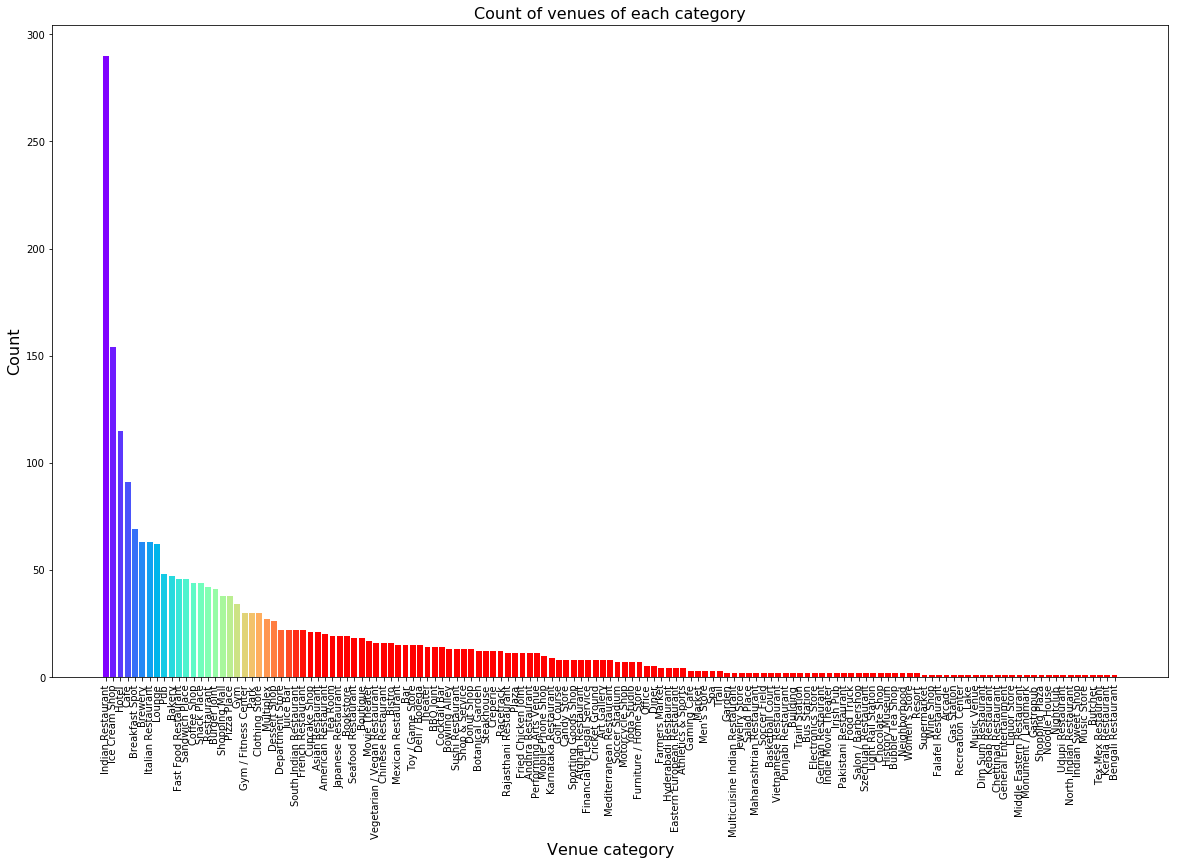

In [25]:
venue_distribution = venues_df['VenueCategory'].value_counts()
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = cm.rainbow(np.linspace(0, 5,len(venue_distribution.index))))

In [26]:
venues_df['VenueCategory'].unique()

array(['Motorcycle Shop', 'Burger Joint', 'Indian Restaurant',
       'Italian Restaurant', 'Ice Cream Shop', 'Gym', 'Brewery',
       'Fast Food Restaurant', 'Bubble Tea Shop', 'Coffee Shop', 'Bistro',
       'Building', 'Snack Place', 'Park', 'Bar', 'Shopping Mall',
       'Nightclub', 'Gym / Fitness Center', 'Hotel', 'Multiplex',
       'Seafood Restaurant', 'Steakhouse', 'Bowling Alley', 'Lounge',
       'Department Store', 'Pizza Place', 'Donut Shop', 'Movie Theater',
       'South Indian Restaurant', 'Chinese Restaurant', 'Café',
       'Breakfast Spot', 'Juice Bar', 'Resort', 'Sandwich Place', 'Pub',
       'Trail', 'Clothing Store', 'French Restaurant',
       'Pakistani Restaurant', 'Wine Shop', 'Restaurant',
       'Vegetarian / Vegan Restaurant', 'Monument / Landmark',
       'Mexican Restaurant', 'American Restaurant', 'Afghan Restaurant',
       'Plaza', 'Cricket Ground', 'Tea Room', 'Bookstore',
       'Deli / Bodega', 'Toy / Game Store', 'Andhra Restaurant',
       'Sush

In [27]:
"Restaurant" in venues_df['VenueCategory'].unique()

True

## 6. Analyze Each Neighborhood

In [28]:
# one hot encoding
df_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['Hospitals'] = venues_df['Hospital'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

print(df_onehot.shape)
df_onehot.head()

(2316, 140)


,Hospitals,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Court,Bengali Restaurant,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Bus Station,Butcher,Café,Candy Store,Chettinad Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Creperie,Cricket Ground,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Golf Course,Gym,Gym / Fitness Center,History Museum,Hotel,Hyderabadi Restaurant,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karnataka Restaurant,Kebab Restaurant,Kerala Restaurant,Lake,Light Rail Station,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,Nightclub,Noodle House,North Indian Restaurant,Office,Pakistani Restaurant,Park,Performing Arts Venue,Pizza Place,Plaza,Pub,Punjabi Restaurant,Racetrack,Rajasthani Restaurant,Recreation Center,Resort,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shop & Service,Shopping Mall,Shopping Plaza,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tea Room,Tex-Mex Restaurant,Theater,Toy / Game Store,Trail,Train Station,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Women's Store,Yoga Studio
0,Bangalore Baptist Hospital,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bangalore Baptist Hospital,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bangalore Baptist Hospital,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bangalore Baptist Hospital,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bangalore Baptist Hospital,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
df_grouped = df_onehot.groupby(["Hospitals"]).mean().reset_index()

print(df_grouped.shape)
df_grouped

(27, 140)


,Hospitals,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Court,Bengali Restaurant,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Bus Station,Butcher,Café,Candy Store,Chettinad Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Creperie,Cricket Ground,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Golf Course,Gym,Gym / Fitness Center,History Museum,Hotel,Hyderabadi Restaurant,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karnataka Restaurant,Kebab Restaurant,Kerala Restaurant,Lake,Light Rail Station,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,Nightclub,Noodle House,North Indian Restaurant,Office,Pakistani Restaurant,Park,Performing Arts Venue,Pizza Place,Plaza,Pub,Punjabi Restaurant,Racetrack,Rajasthani Restaurant,Recreation Center,Resort,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shop & Service,Shopping Mall,Shopping Plaza,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tea Room,Tex-Mex Restaurant,Theater,Toy / Game Store,Trail,Train Station,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Women's Store,Yoga Studio
0,Bangalore Baptist Hospital,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.02,0.000000,0.00,0.01,0.00,0.00,0.00,0.020000,0.02,0.010000,0.01,0.01,0.01,0.000000,0.00,0.030000,0.00,0.00,0.030000,0.00,0.020000,0.00,0.040000,0.000000,0.00,0.00,0.00,0.03,0.00,0.000000,0.000000,0.010000,0.00,0.00,0.00,0.00,0.040000,0.00,0.00,0.020000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.02,0.010000,0.00,0.030000,0.00,0.080000,0.150000,0.00,0.00,0.00,0.040000,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.020000,0.00,0.000000,0.00,0.000000,0.01,0.00,0.00,0.01,0.01,0.010000,0.00,0.030000,0.00,0.00,0.00,0.01,0.000000,0.00,0.000000,0.01,0.02,0.000000,0.040000,0.00,0.02,0.00,0.000000,0.000000,0.00,0.01,0.010000,0.00,0.00,0.010000,0.01,0.00,0.010000,0.000000,0.02,0.00,0.00,0.01,0.00,0.000000,0.01,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.01,0.000000,0.00,0.02,0.000000,0.01,0.00,0.00
1,Bowring & Lady Curzon Hospitals,0.01,0.010000,0.01,0.00,0.01,0.020000,0.000000,0.01,0.000000,0.00,0.000000,0.00,0.00,0.01,0.00,0.01,0.000000,0.01,0.030000,0.00,0.00,0.02,0.000000,0.00,0.040000,0.00,0.00,0.000000,0.00,0.010000,0.01,0.010000,0.000000,0.01,0.01,0.01,0.02,0.00,0.000000,0.000000,0.000000,0.01,0.00,0.00,0.00,0.000000,0.00,0.00,0.010000,0.01,0.00,0.01,0.00,0.00,0.000000,0.00,0.00,0.01,0.01,0.010000,0.00,0.100000,0.00,0.080000,0.120000,0.00,0.00,0.00,0.020000,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.040000,0.00,0.010000,0.01,0.000000,0.01,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.03,0.000000,0.010000,0.01,0.04,0.00,0.010000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.02,0.00,0.020000,0.000000,0.01,0.00,0.01,0.00,0.01,0.000000,0.01,0.000000,0.01,0.00,0.02,0.000000,0.01,0.020000,0.00,0.000000,0.00,0.01,0.000000,0.00,0.00,0.00
2,Cloudnine Hospitals,0.00,0.000000,0.01,0.01,0.00,0.030000,0.010000,0.02,0.030000,0.01,0.000000,0.01,0.00,0.01,0.00,0.02,0.000000

In [30]:
len(df_grouped[df_grouped["Restaurant"] > 0])

22

In [31]:
df_new = df_grouped[["Hospitals","Restaurant"]]
df_new

,Hospitals,Restaurant
0,Bangalore Baptist Hospital,0.010000
1,Bowring & Lady Curzon Hospitals,0.000000
2,Cloudnine Hospitals,0.030000
3,Columbia Asia,0.000000
4,Gunasheela Surgical and Maternity Hospital,0.010000
5,HOSMAT,0.010000
6,"Indira Gandhi Institute of Child Health, Banga...",0.010000
7,Kidwai Memorial Institute of Oncology,0.010000
8,Maharaja Agrasen Hospital (Bangalore),0.030000
9,Mazumdar Shaw Medical Centre,0.000000


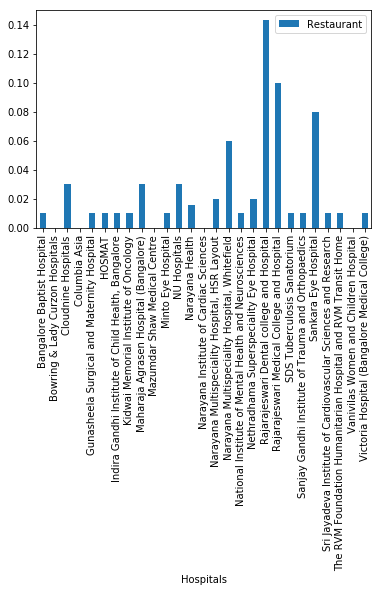

In [32]:
ax = df_new.plot.bar(x='Hospitals', y='Restaurant', rot=90)

## 7. Cluster Neighborhoods using K-Means

In [63]:
# set number of clusters
kclusters = 4

df_clustering = df_new.drop(["Hospitals"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 2, 0, 0, 0, 0, 0, 2, 0], dtype=int32)

In [64]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
df_merged = df_new.copy()

# add clustering labels
df_merged["Cluster Labels"] = kmeans.labels_

In [65]:
df_merged.rename(columns={"Hospitals": "Hospital"}, inplace=True)
df_merged.head()

,Hospital,Restaurant,Cluster Labels
0,Bangalore Baptist Hospital,0.01,0
1,Bowring & Lady Curzon Hospitals,0.00,0
2,Cloudnine Hospitals,0.03,2
3,Columbia Asia,0.00,0
4,Gunasheela Surgical and Maternity Hospital,0.01,0


In [66]:
df_merged = df_merged.join(df.set_index("Hospital"), on="Hospital")

print(df_merged.shape)
df_merged.head() 

(27, 5)


,Hospital,Restaurant,Cluster Labels,Latitude,Longitude
0,Bangalore Baptist Hospital,0.01,0,13.03585,77.58927
1,Bowring & Lady Curzon Hospitals,0.00,0,12.98216,77.60447
2,Cloudnine Hospitals,0.03,2,12.95934,77.65667
3,Columbia Asia,0.00,0,13.02628,77.58871
4,Gunasheela Surgical and Maternity Hospital,0.01,0,12.94055,77.57656


In [67]:
# sort the results by Cluster Labels
print(df_merged.shape)
df_merged.sort_values(["Cluster Labels"], inplace=True)
df_merged

(27, 5)


,Hospital,Restaurant,Cluster Labels,Latitude,Longitude
0,Bangalore Baptist Hospital,0.010000,0,13.03585,77.58927
24,The RVM Foundation Humanitarian Hospital and R...,0.010000,0,12.96618,77.58690
23,Sri Jayadeva Institute of Cardiovascular Scien...,0.010000,0,12.91857,77.59996
21,Sanjay Gandhi Institute of Trauma and Orthopae...,0.010000,0,12.93614,77.59399
20,SDS Tuberculosis Sanatorium,0.010000,0,12.96618,77.58690
16,National Institute of Mental Health and Neuros...,0.010000,0,12.93906,77.59447
25,Vanivilas Women and Children Hospital,0.000000,0,13.00013,77.56902
12,Narayana Health,0.015385,0,13.03424,77.71971
10,Minto Eye Hospital,0.010000,0,12.96039,77.57269
13,Narayana Institute of Cardiac Sciences,0.000000,0,12.80966,77.69590


## 8. Map the clusters

In [69]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Hospital'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 9. Examine Clusters

In [70]:
df_merged.loc[df_merged['Cluster Labels'] == 0]

,Hospital,Restaurant,Cluster Labels,Latitude,Longitude
0,Bangalore Baptist Hospital,0.010000,0,13.03585,77.58927
24,The RVM Foundation Humanitarian Hospital and R...,0.010000,0,12.96618,77.58690
23,Sri Jayadeva Institute of Cardiovascular Scien...,0.010000,0,12.91857,77.59996
21,Sanjay Gandhi Institute of Trauma and Orthopae...,0.010000,0,12.93614,77.59399
20,SDS Tuberculosis Sanatorium,0.010000,0,12.96618,77.58690
16,National Institute of Mental Health and Neuros...,0.010000,0,12.93906,77.59447
25,Vanivilas Women and Children Hospital,0.000000,0,13.00013,77.56902
12,Narayana Health,0.015385,0,13.03424,77.71971
10,Minto Eye Hospital,0.010000,0,12.96039,77.57269
13,Narayana Institute of Cardiac Sciences,0.000000,0,12.80966,77.69590


In [71]:
df_merged.loc[df_merged['Cluster Labels'] == 1]

,Hospital,Restaurant,Cluster Labels,Latitude,Longitude
15,"Narayana Multispeciality Hospital, Whitefield",0.06,1,12.98944,77.73346
22,Sankara Eye Hospital,0.08,1,12.95686,77.71314
19,Rajarajeswari Medical College and Hospital,0.10,1,12.89685,77.46139


In [72]:
df_merged.loc[df_merged['Cluster Labels'] == 2]

,Hospital,Restaurant,Cluster Labels,Latitude,Longitude
2,Cloudnine Hospitals,0.03,2,12.95934,77.65667
8,Maharaja Agrasen Hospital (Bangalore),0.03,2,12.91604,77.55502
14,"Narayana Multispeciality Hospital, HSR Layout",0.02,2,12.90849,77.64345
11,NU Hospítals,0.03,2,12.91755,77.55505
17,Nethradhama Superspeciality Eye Hospital,0.02,2,12.97360,77.63581


In [73]:
df_merged.loc[df_merged['Cluster Labels'] == 3]

,Hospital,Restaurant,Cluster Labels,Latitude,Longitude
18,Rajarajeswari Dental college and Hospital,0.142857,3,12.88728,77.45125


## 10. Observations

Most of the Hospitals are concentrated in the central area of Bangalore city, with the highest number of Restaurants in cluster 3 and moderate number in cluster 1. On the other hand, cluster 0 has very low number to no Restaurants near the Hospitals. This represents a great opportunity and high potential areas to open new Restaurants as there is very little to no competition from existing places. Meanwhile, Restaurants in cluster 3 are likely suffering from intense competition due to oversupply and high concentration of the same. 